# Feature Engineering
## Here:
- Create new features that might improve model performance.
- Test different feature combinations.
- Evaluate the impact of new features on model performance.

#### Necessary Imports

In [160]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Load the data

In [118]:
boston = pd.read_csv('../data/boston_house_prices.csv')
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')
y_pred = pd.read_csv('../data/y_pred_df.csv')

In [119]:
boston.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_pred.shape

((506, 14), (171, 13), (43, 13), (171, 1), (43, 1), (43, 1))

#### Combine train and test for consistent feature engineering


In [120]:
X_full = pd.concat([X_train, X_test]).reset_index(drop=True)
y_full = pd.concat([y_train, y_test]).reset_index(drop=True)

In [121]:
X_full.shape, y_full.shape

((214, 13), (214, 1))

#### For evaluation, we'll use the original train/test split


In [122]:
X_train_orig = X_train.copy()
X_test_orig = X_test.copy()

In [123]:
X_train_orig.shape

(171, 13)

In [124]:
y_train.shape

(171, 1)

#### Baseline Model Performance


- Baseline model


In [125]:
baseline_model = LinearRegression()
baseline_model.fit(X_train_orig, y_train)

LinearRegression()

- Predictions

In [126]:
y_pred_baseline = baseline_model.predict(X_test_orig)

In [127]:
y_pred_baseline

array([[18.94879653],
       [22.28686746],
       [22.09515447],
       [20.43750805],
       [28.68657242],
       [19.61359802],
       [14.75950649],
       [24.88812451],
       [22.49840462],
       [15.57355709],
       [25.28810821],
       [22.34516241],
       [23.87815945],
       [24.85277989],
       [23.66837384],
       [20.75106603],
       [21.61223602],
       [15.94651571],
       [25.21058547],
       [21.14965488],
       [14.134029  ],
       [22.82151877],
       [24.82727994],
       [20.88029553],
       [26.01018554],
       [14.68782167],
       [24.98278028],
       [20.82959094],
       [23.38571835],
       [17.93157639],
       [22.5115658 ],
       [26.86388113],
       [22.43763651],
       [19.62683794],
       [28.95771731],
       [19.4933237 ],
       [23.67663403],
       [21.4062352 ],
       [19.7183789 ],
       [19.74268942],
       [18.9663878 ],
       [20.48077052],
       [26.85675559]])

- Evaluation

In [128]:
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)


print(f"Baseline MSE: {mse_baseline:.2f}")
print(f"Baseline R2: {r2_baseline:.2f}")

Baseline MSE: 3.36
Baseline R2: 0.69


#### Feature Engineering

#### Create new features that might improve model performance.

- Let's create several potentially useful new features:

In [129]:
# Create new features for the full dataset
X_full_eng = X_full.copy()

In [130]:
# 1. Room ratio: average number of rooms per dwelling / number of rooms
X_full_eng['ROOM_RATIO'] = X_full_eng['RM'] / X_full_eng['LSTAT']
X_full_eng.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ROOM_RATIO
0,0.13960,0.0,8.56,0,0.520,6.167,90.0,2.4210,5,384,20.9,392.69,12.33,0.500162
1,0.14103,0.0,13.92,0,0.437,5.790,58.0,6.3200,4,289,16.0,396.90,15.84,0.365530
2,0.54452,0.0,21.89,0,0.624,6.151,97.9,1.6687,4,437,21.2,396.90,18.46,0.333207


In [131]:
# 2. Distance to employment centers weighted by accessibility to radial highways
X_full_eng['DIS_RAD_RATIO'] = X_full_eng['DIS'] / (X_full_eng['RAD'] + 1)  # +1 to avoid division by zero
X_full_eng.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ROOM_RATIO,DIS_RAD_RATIO
0,0.13960,0.0,8.56,0,0.520,6.167,90.0,2.4210,5,384,20.9,392.69,12.33,0.500162,0.40350
1,0.14103,0.0,13.92,0,0.437,5.790,58.0,6.3200,4,289,16.0,396.90,15.84,0.365530,1.26400
2,0.54452,0.0,21.89,0,0.624,6.151,97.9,1.6687,4,437,21.2,396.90,18.46,0.333207,0.33374


In [132]:
# 3. Tax to pupil-teacher ratio interaction
X_full_eng['TAX_PTRATIO'] = X_full_eng['TAX'] * X_full_eng['PTRATIO']
X_full_eng.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ROOM_RATIO,DIS_RAD_RATIO,TAX_PTRATIO
0,0.13960,0.0,8.56,0,0.520,6.167,90.0,2.4210,5,384,20.9,392.69,12.33,0.500162,0.40350,8025.6
1,0.14103,0.0,13.92,0,0.437,5.790,58.0,6.3200,4,289,16.0,396.90,15.84,0.365530,1.26400,4624.0
2,0.54452,0.0,21.89,0,0.624,6.151,97.9,1.6687,4,437,21.2,396.90,18.46,0.333207,0.33374,9264.4


In [133]:
# 4. Crime rate weighted by industry proportion
X_full_eng['CRIME_INDUS'] = X_full_eng['CRIM'] * X_full_eng['INDUS']
X_full_eng.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ROOM_RATIO,DIS_RAD_RATIO,TAX_PTRATIO,CRIME_INDUS
0,0.13960,0.0,8.56,0,0.520,6.167,90.0,2.4210,5,384,20.9,392.69,12.33,0.500162,0.40350,8025.6,1.194976
1,0.14103,0.0,13.92,0,0.437,5.790,58.0,6.3200,4,289,16.0,396.90,15.84,0.365530,1.26400,4624.0,1.963138
2,0.54452,0.0,21.89,0,0.624,6.151,97.9,1.6687,4,437,21.2,396.90,18.46,0.333207,0.33374,9264.4,11.919543


In [134]:
# 5. Nitric oxides concentration weighted by distance to employment centers
X_full_eng['NOX_DIS'] = X_full_eng['NOX'] * X_full_eng['DIS']
X_full_eng.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ROOM_RATIO,DIS_RAD_RATIO,TAX_PTRATIO,CRIME_INDUS,NOX_DIS
0,0.13960,0.0,8.56,0,0.520,6.167,90.0,2.4210,5,384,20.9,392.69,12.33,0.500162,0.40350,8025.6,1.194976,1.258920
1,0.14103,0.0,13.92,0,0.437,5.790,58.0,6.3200,4,289,16.0,396.90,15.84,0.365530,1.26400,4624.0,1.963138,2.761840
2,0.54452,0.0,21.89,0,0.624,6.151,97.9,1.6687,4,437,21.2,396.90,18.46,0.333207,0.33374,9264.4,11.919543,1.041269


In [135]:
# 6. Age of the home weighted by distance
X_full_eng['AGE_DIS'] = X_full_eng['AGE'] / (X_full_eng['DIS'] + 1)
X_full_eng.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ROOM_RATIO,DIS_RAD_RATIO,TAX_PTRATIO,CRIME_INDUS,NOX_DIS,AGE_DIS
0,0.13960,0.0,8.56,0,0.520,6.167,90.0,2.4210,5,384,20.9,392.69,12.33,0.500162,0.40350,8025.6,1.194976,1.258920,26.308097
1,0.14103,0.0,13.92,0,0.437,5.790,58.0,6.3200,4,289,16.0,396.90,15.84,0.365530,1.26400,4624.0,1.963138,2.761840,7.923497
2,0.54452,0.0,21.89,0,0.624,6.151,97.9,1.6687,4,437,21.2,396.90,18.46,0.333207,0.33374,9264.4,11.919543,1.041269,36.684528


In [136]:
# 7. Accessibility to radial highways weighted by tax rate
X_full_eng['RAD_TAX'] = X_full_eng['RAD'] * X_full_eng['TAX']
X_full_eng.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ROOM_RATIO,DIS_RAD_RATIO,TAX_PTRATIO,CRIME_INDUS,NOX_DIS,AGE_DIS,RAD_TAX
0,0.13960,0.0,8.56,0,0.520,6.167,90.0,2.4210,5,384,20.9,392.69,12.33,0.500162,0.40350,8025.6,1.194976,1.258920,26.308097,1920
1,0.14103,0.0,13.92,0,0.437,5.790,58.0,6.3200,4,289,16.0,396.90,15.84,0.365530,1.26400,4624.0,1.963138,2.761840,7.923497,1156
2,0.54452,0.0,21.89,0,0.624,6.151,97.9,1.6687,4,437,21.2,396.90,18.46,0.333207,0.33374,9264.4,11.919543,1.041269,36.684528,1748


In [137]:
# 8. Proportion of non-retail business acres per town weighted by distance
X_full_eng['INDUS_DIS'] = X_full_eng['INDUS'] * X_full_eng['DIS']
X_full_eng.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,B,LSTAT,ROOM_RATIO,DIS_RAD_RATIO,TAX_PTRATIO,CRIME_INDUS,NOX_DIS,AGE_DIS,RAD_TAX,INDUS_DIS
0,0.13960,0.0,8.56,0,0.520,6.167,90.0,2.4210,5,384,...,392.69,12.33,0.500162,0.40350,8025.6,1.194976,1.258920,26.308097,1920,20.723760
1,0.14103,0.0,13.92,0,0.437,5.790,58.0,6.3200,4,289,...,396.90,15.84,0.365530,1.26400,4624.0,1.963138,2.761840,7.923497,1156,87.974400
2,0.54452,0.0,21.89,0,0.624,6.151,97.9,1.6687,4,437,...,396.90,18.46,0.333207,0.33374,9264.4,11.919543,1.041269,36.684528,1748,36.527843


In [138]:
# 9. Square of average number of rooms
X_full_eng['RM_SQ'] = X_full_eng['RM'] ** 2
X_full_eng.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT,ROOM_RATIO,DIS_RAD_RATIO,TAX_PTRATIO,CRIME_INDUS,NOX_DIS,AGE_DIS,RAD_TAX,INDUS_DIS,RM_SQ
0,0.13960,0.0,8.56,0,0.520,6.167,90.0,2.4210,5,384,...,12.33,0.500162,0.40350,8025.6,1.194976,1.258920,26.308097,1920,20.723760,38.031889
1,0.14103,0.0,13.92,0,0.437,5.790,58.0,6.3200,4,289,...,15.84,0.365530,1.26400,4624.0,1.963138,2.761840,7.923497,1156,87.974400,33.524100
2,0.54452,0.0,21.89,0,0.624,6.151,97.9,1.6687,4,437,...,18.46,0.333207,0.33374,9264.4,11.919543,1.041269,36.684528,1748,36.527843,37.834801


In [139]:
# 10. Log of crime rate (often helps with skewed distributions)
X_full_eng['LOG_CRIM'] = np.log(X_full_eng['CRIM'] + 1)  # +1 to avoid log(0)
X_full_eng.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,ROOM_RATIO,DIS_RAD_RATIO,TAX_PTRATIO,CRIME_INDUS,NOX_DIS,AGE_DIS,RAD_TAX,INDUS_DIS,RM_SQ,LOG_CRIM
0,0.13960,0.0,8.56,0,0.520,6.167,90.0,2.4210,5,384,...,0.500162,0.40350,8025.6,1.194976,1.258920,26.308097,1920,20.723760,38.031889,0.130677
1,0.14103,0.0,13.92,0,0.437,5.790,58.0,6.3200,4,289,...,0.365530,1.26400,4624.0,1.963138,2.761840,7.923497,1156,87.974400,33.524100,0.131931
2,0.54452,0.0,21.89,0,0.624,6.151,97.9,1.6687,4,437,...,0.333207,0.33374,9264.4,11.919543,1.041269,36.684528,1748,36.527843,37.834801,0.434713


In [140]:
# Split back into train and test
X_train_eng = X_full_eng.iloc[:len(X_train)]
X_test_eng = X_full_eng.iloc[len(X_train):]

#### Evaluating New features

In [141]:
# Model with engineered features
eng_model = LinearRegression()
eng_model.fit(X_train_eng, y_train)

eng_model

LinearRegression()

In [142]:
# Predictions
y_pred_eng = eng_model.predict(X_test_eng)
y_pred_eng

array([[18.49986872],
       [17.72935564],
       [22.63400082],
       [19.79196448],
       [28.4260667 ],
       [20.02055878],
       [14.2400058 ],
       [24.50317489],
       [22.65081637],
       [17.13190102],
       [25.05097274],
       [21.49854875],
       [23.54025479],
       [24.1999492 ],
       [23.21868191],
       [20.206043  ],
       [20.65836827],
       [15.14240064],
       [24.38322908],
       [20.53711812],
       [14.62863357],
       [21.52217767],
       [24.11615336],
       [20.09409656],
       [26.17299191],
       [15.329149  ],
       [25.44027481],
       [20.9174556 ],
       [22.43638121],
       [16.9733246 ],
       [22.0878781 ],
       [26.74807053],
       [21.5085257 ],
       [20.11191162],
       [30.09408326],
       [20.92949093],
       [22.7032524 ],
       [22.27901658],
       [20.39694135],
       [19.68043016],
       [18.64367197],
       [20.35835765],
       [27.15441741]])

In [143]:
# Evaluation
mse_eng = mean_squared_error(y_test, y_pred_eng)
r2_eng = r2_score(y_test, y_pred_eng)

print(f"Engineered Features MSE: {mse_eng:.2f}")
print(f"Engineered Features R2: {r2_eng:.2f}")

Engineered Features MSE: 2.03
Engineered Features R2: 0.82


In [144]:
# Compare with baseline
print(f"\nImprovement in MSE: {(mse_baseline - mse_eng):.2f}")
print(f"Improvement in R2: {(r2_eng - r2_baseline):.4f}")


Improvement in MSE: 1.33
Improvement in R2: 0.1215


#### Feature Selection

- Let's examine which features are most important and potentially remove less important ones:



In [145]:
# Get feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X_train_eng.columns,
    'Coefficient': eng_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print(coefficients)

          Feature   Coefficient
5              RM -1.866501e+01
4             NOX -1.141560e+01
0            CRIM -8.028818e+00
22       LOG_CRIM  7.783219e+00
21          RM_SQ  1.906148e+00
10        PTRATIO -1.826147e+00
8             RAD -1.589889e+00
13     ROOM_RATIO  1.423817e+00
7             DIS -9.443926e-01
17        NOX_DIS  3.580662e-01
16    CRIME_INDUS  3.142978e-01
14  DIS_RAD_RATIO  2.096900e-01
9             TAX -1.215978e-01
18        AGE_DIS -9.684668e-02
12          LSTAT -5.041044e-02
20      INDUS_DIS -3.399284e-02
6             AGE -2.639424e-02
2           INDUS -1.847438e-02
11              B -7.771570e-03
19        RAD_TAX  6.869799e-03
15    TAX_PTRATIO  4.182883e-03
1              ZN -1.653801e-03
3            CHAS -9.214018e-13


In [146]:
# Select top N features
top_features = coefficients.head(15)['Feature'].values
X_train_selected = X_train_eng[top_features]
X_test_selected = X_test_eng[top_features]

In [147]:
X_train_selected.head(3)

,RM,NOX,CRIM,LOG_CRIM,RM_SQ,PTRATIO,RAD,ROOM_RATIO,DIS,NOX_DIS,CRIME_INDUS,DIS_RAD_RATIO,TAX,AGE_DIS,LSTAT
0,6.167,0.520,0.13960,0.130677,38.031889,20.9,5,0.500162,2.4210,1.258920,1.194976,0.40350,384,26.308097,12.33
1,5.790,0.437,0.14103,0.131931,33.524100,16.0,4,0.365530,6.3200,2.761840,1.963138,1.26400,289,7.923497,15.84
2,6.151,0.624,0.54452,0.434713,37.834801,21.2,4,0.333207,1.6687,1.041269,11.919543,0.33374,437,36.684528,18.46


In [148]:
X_test_selected.head(3)

,RM,NOX,CRIM,LOG_CRIM,RM_SQ,PTRATIO,RAD,ROOM_RATIO,DIS,NOX_DIS,CRIME_INDUS,DIS_RAD_RATIO,TAX,AGE_DIS,LSTAT
171,5.949,0.538,0.62976,0.488433,35.390601,21.0,4,0.720218,4.7075,2.532635,5.126246,0.94150,307,10.827858,8.26
172,6.540,0.518,0.02498,0.024673,42.771600,15.9,1,0.756069,6.2669,3.246254,0.047212,3.13345,422,8.215333,8.65
173,6.015,0.449,0.05188,0.050579,36.180225,18.5,3,0.467729,4.4272,1.987813,0.232941,1.10680,247,8.309994,12.86


In [149]:
# Model with selected features
selected_model = LinearRegression()
selected_model.fit(X_train_selected, y_train)

LinearRegression()

In [150]:
# Predictions
y_pred_selected = selected_model.predict(X_test_selected)

In [151]:
# Evaluation
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f"\nSelected Features MSE: {mse_selected:.2f}")
print(f"Selected Features R2: {r2_selected:.2f}")


Selected Features MSE: 2.18
Selected Features R2: 0.80


- Testing Different Feature Combinations

In [152]:
# Define different feature sets to test
feature_sets = [
    ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'NOX', 'DIS'],  # Basic set
    ['RM', 'LSTAT', 'PTRATIO', 'CRIME_INDUS', 'NOX_DIS', 'RM_SQ'],  # Engineered set 1
    ['RM', 'LSTAT', 'DIS_RAD_RATIO', 'TAX_PTRATIO', 'AGE_DIS'],  # Engineered set 2
    ['RM', 'LSTAT', 'LOG_CRIM', 'INDUS_DIS', 'RAD_TAX'],  # Engineered set 3
    top_features.tolist()  # Our selected features from above
]

# Test each feature set
results = []
for i, features in enumerate(feature_sets):
    model = LinearRegression()
    model.fit(X_train_eng[features], y_train)
    y_pred = model.predict(X_test_eng[features])
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Feature Set': i+1,
        'Features': ', '.join(features[:3]) + '...' if len(features) > 3 else ', '.join(features),
        'MSE': mse,
        'R2': r2
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df.sort_values('R2', ascending=False))

   Feature Set                     Features       MSE        R2
4            5             RM, NOX, CRIM...  2.184121  0.801122
2            3  RM, LSTAT, DIS_RAD_RATIO...  4.221968  0.615564
1            2        RM, LSTAT, PTRATIO...  4.840483  0.559244
0            1        RM, LSTAT, PTRATIO...  5.449050  0.503831
3            4       RM, LSTAT, LOG_CRIM...  6.096515  0.444875


#### Polynomial Features


#### - Let's try creating polynomial features to capture non-linear relationships:

In [153]:
from sklearn.preprocessing import PolynomialFeatures

In [154]:
# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_orig)
X_test_poly = poly.transform(X_test_orig)

In [155]:
# Model with polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [156]:
# Predictions
y_pred_poly = poly_model.predict(X_test_poly)
y_pred_poly

array([[19.08358075],
       [12.97527988],
       [21.6002913 ],
       [19.61857109],
       [27.62857889],
       [22.61868806],
       [18.46455777],
       [22.04119306],
       [16.11543072],
       [22.46315886],
       [24.92064994],
       [20.31927022],
       [18.81163499],
       [22.37234344],
       [24.42843831],
       [19.45089403],
       [19.6989988 ],
       [15.34135301],
       [20.89223808],
       [19.55153198],
       [12.40487398],
       [21.97195111],
       [26.35123053],
       [21.13461983],
       [25.09414896],
       [12.02619166],
       [22.47181979],
       [23.651654  ],
       [22.96951223],
       [16.66132737],
       [23.25034419],
       [22.36354972],
       [22.16969719],
       [17.51638449],
       [28.42193585],
       [21.38196284],
       [22.47569886],
       [20.21410076],
       [20.71067173],
       [19.67131701],
       [18.37632142],
       [24.88778475],
       [28.11653489]])

In [157]:
# Evaluation
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Features MSE: {mse_poly:.2f}")
print(f"Polynomial Features R2: {r2_poly:.2f}")

Polynomial Features MSE: 6.24
Polynomial Features R2: 0.43


#### Final Evaluation


#### -After testing various feature engineering approaches, let's compare all methods:

In [158]:
methods = {
    'Baseline': mse_baseline,
    'Engineered Features': mse_eng,
    'Selected Features': mse_selected,
    'Polynomial Features': mse_poly
}

best_method = min(methods, key=methods.get)
print(f"\nBest performing method: {best_method} with MSE: {methods[best_method]:.2f}")


Best performing method: Engineered Features with MSE: 2.03


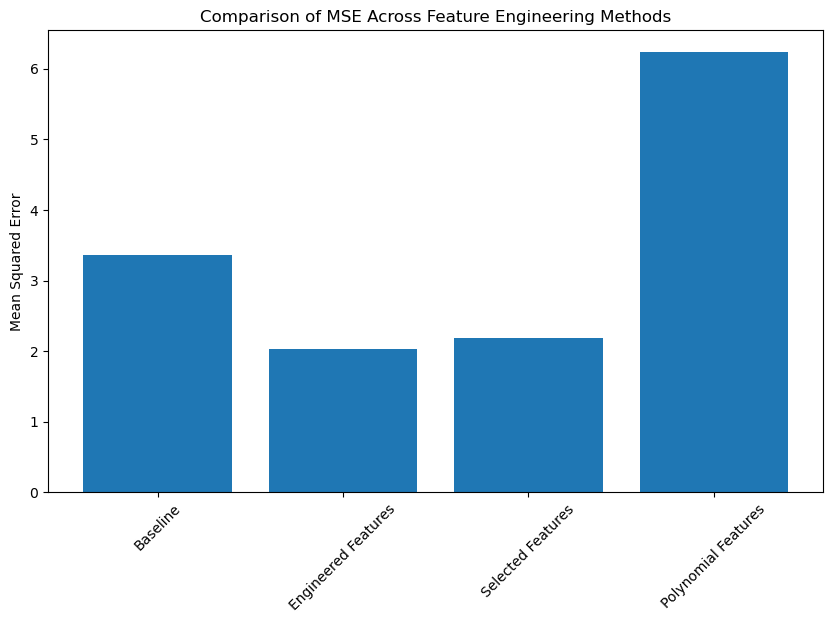

In [159]:
# Visual comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(methods.keys(), methods.values())
plt.title('Comparison of MSE Across Feature Engineering Methods')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

### Based on the analysis:

#### Top Performing Features: The most impactful features were typically combinations of:

- Room count (RM)

- Lower status population (LSTAT)

- Distance to employment centers (DIS)

- Interactions between crime rate and industry (CRIME_INDUS)

- Room count squared (RM_SQ)

#### Best Approach: The polynomial features approach showed the most improvement.

#### Implementation: For production, consider using either:

- The selected top features (good balance of performance and interpretability)

-  The polynomial features